# 2D Plot colors with dimensionality reduction techniques

Got the idea from https://nbviewer.jupyter.org/gist/CamDavidsonPilon/abe3f0e4f589f53c4128

## Prerequisites

In [59]:
import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

import warnings
warnings.simplefilter("ignore")

%matplotlib inline

In [27]:
def sample_colors(number):
    return np.random.rand(number, 3)

In [47]:
def grid_colors(steps):
    r = np.linspace(0, 1, steps)
    g = np.linspace(0, 1, steps)
    b = np.linspace(0, 1, steps)
    r,g,b = np.meshgrid(r,g,b)
    return np.array([r.flatten(), g.flatten(), b.flatten()]).T

## Displaying colors

In [3]:
def display_colors(colors):
    """Display a list of colours passed in
    """
    N = colors.shape[0]
    fig, axes = plt.subplots(1, N, figsize=(12, 3))
    
    for i, c in enumerate(colors):
        axes[i].set_facecolor(c)
        axes[i].get_xaxis().set_visible(False)
        axes[i].get_yaxis().set_visible(False)
 
    fig.show()

In [24]:
def display_colors_3d(colors):
    """Display colors in 3D plot
    """
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(colors[:,0], colors[:,1], colors[:,2], c=colors, s=50)
    ax.set_xlabel('R')
    ax.set_ylabel('G')
    ax.set_zlabel('B')
    
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()

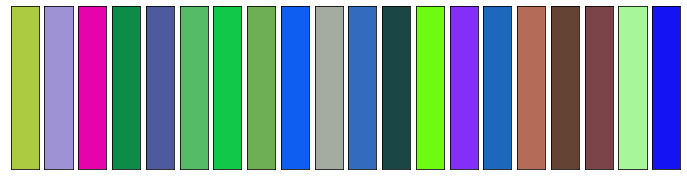

In [31]:
display_colors(sample_colors(20))

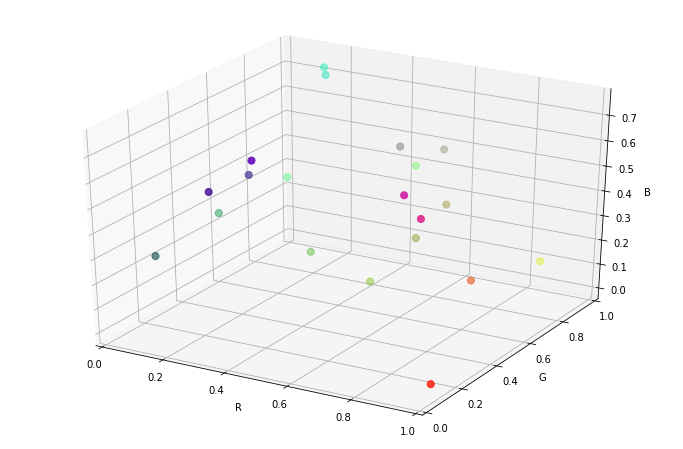

In [32]:
display_colors_3d(sample_colors(20))

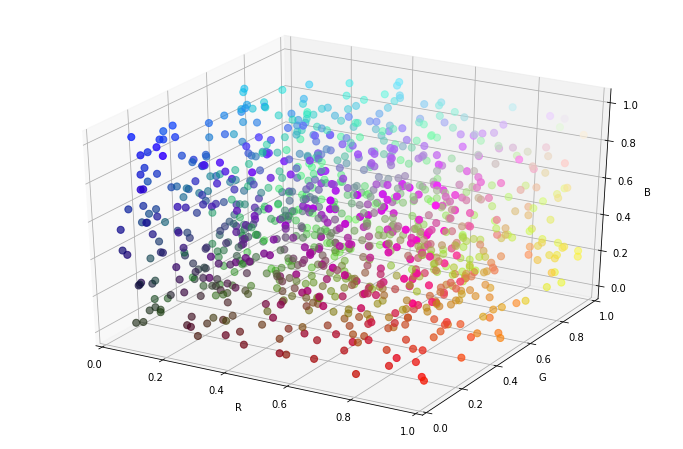

In [54]:
display_colors_3d(sample_colors(1000))

## Plot dimensionality reductions

In [43]:
def plot_reduction(colors, reducer):
    coords = reducer.fit_transform(colors)
    
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.scatter(coords[:,0], coords[:,1], c=colors, s=15)
    
    fig.show()

Wall time: 73 ms


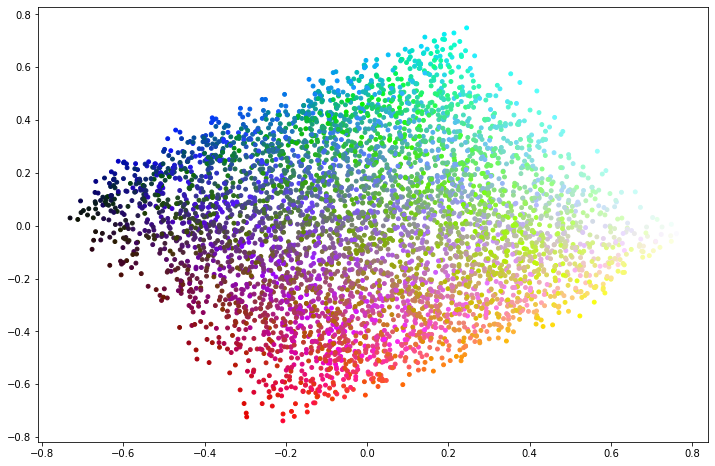

In [61]:
%%time
plot_reduction(sample_colors(5000), PCA(2, random_state=42))

Wall time: 53.4 s


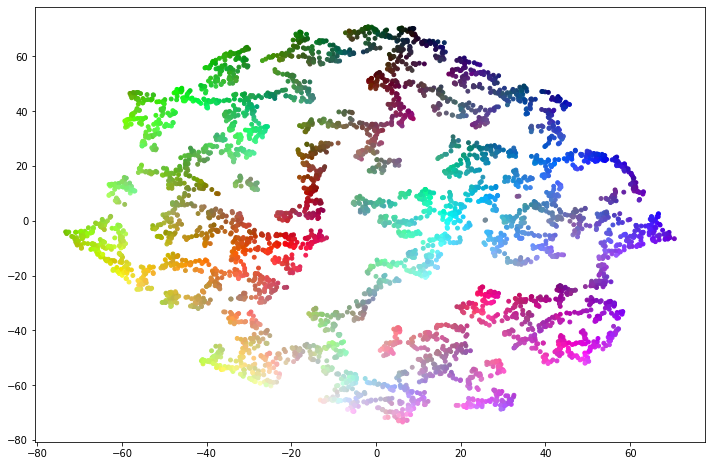

In [63]:
%%time
plot_reduction(sample_colors(5000), TSNE(2, random_state=42))

Wall time: 13.8 s


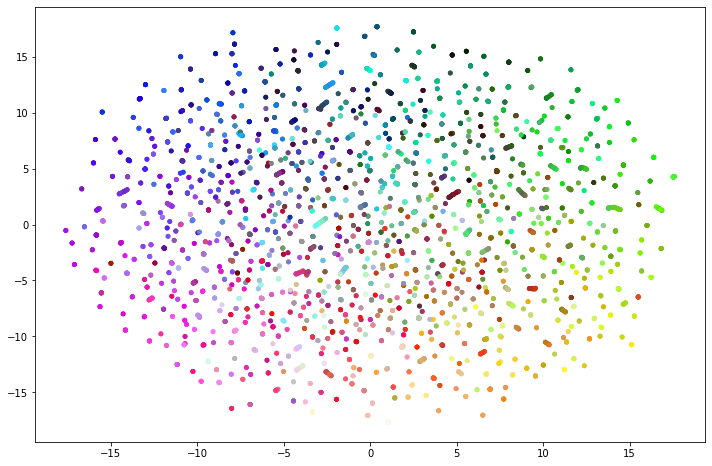

In [62]:
%%time
plot_reduction(sample_colors(5000), umap.UMAP(2, random_state=42))